In [2]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd

from scipy.io import loadmat
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# MAT 388E HW3

## Q1

This is going to be an image classification problem. For this problem we are going to use [the corrected Indian Pines Dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines).

1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).
2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  

3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.
6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class? 

## Soln 1

In [3]:
pine = loadmat('./data/Indian_pines_corrected.mat')['indian_pines_corrected']
pine_gt = loadmat('./data/Indian_pines_gt.mat')['indian_pines_gt']

X = pine.reshape((145*145,200))
yraw = pine_gt.reshape(145*145)

In [4]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score

In [5]:
encoder = LabelBinarizer()
y = encoder.fit_transform(yraw)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [6]:
def build_model(X, y, cluster, model):
    score = cross_val_score(model, X, y[:, cluster], scoring='accuracy', n_jobs=-1, cv=10)
    return score

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [8]:
lr_score = {}
for cluster in range(17):
    lr_score[cluster] = build_model(X, y, cluster, LogisticRegression(solver="liblinear", max_iter=1500))

In [9]:
lr_score

{0: array([0.56395625, 0.71326676, 0.74560152, 0.75416072, 0.81217309,
        0.87297812, 0.82207422, 0.76641294, 0.56755471, 0.65889629]),
 1: array([0.99809796, 1.        , 0.99809796, 0.99476938, 0.99667142,
        0.99952426, 1.        , 0.99904853, 0.99857279, 1.        ]),
 2: array([0.9106039 , 0.92819781, 0.92677128, 0.94436519, 0.95720399,
        0.97954329, 0.95908658, 0.96241675, 0.96098953, 0.95908658]),
 3: array([0.96148359, 0.96766524, 0.93913457, 0.95292439, 0.97384689,
        0.96241675, 0.97431018, 0.96955281, 0.96384396, 0.95432921]),
 4: array([0.97765097, 0.98858773, 0.95672848, 0.9871612 , 0.98906324,
        0.97193149, 0.99286394, 0.99096099, 0.99286394, 0.99096099]),
 5: array([0.98050404, 0.98858773, 0.98383262, 0.99048978, 0.97622444,
        0.97573739, 0.99333968, 0.97668887, 0.97906755, 0.98192198]),
 6: array([0.98193058, 0.98573466, 0.98668569, 0.98953875, 0.98763671,
        0.98382493, 0.98715509, 0.96955281, 0.98572788, 0.97526166]),
 7: array([0.

In [10]:
svm_score = {}
for cluster in range(17):
    svm_score[cluster] = build_model(X, y, cluster, SVC(kernel='rbf',C=2.0))

In [11]:
svm_score

{0: array([0.60770328, 0.76367095, 0.76319544, 0.78221588, 0.82168331,
        0.88820171, 0.81446242, 0.78163654, 0.58230257, 0.64557564]),
 1: array([0.99762244, 0.99762244, 0.99762244, 0.99762244, 0.99762244,
        0.99809705, 0.99809705, 0.99809705, 0.99809705, 0.99762131]),
 2: array([0.92058963, 0.91250594, 0.90347123, 0.9063243 , 0.9320019 ,
        0.93244529, 0.93244529, 0.93196955, 0.93196955, 0.93196955]),
 3: array([0.96053257, 0.96053257, 0.96053257, 0.96053257, 0.96053257,
        0.9605138 , 0.9605138 , 0.9605138 , 0.9605138 , 0.9605138 ]),
 4: array([0.98858773, 0.98858773, 0.98858773, 0.98858773, 0.98858773,
        0.98905804, 0.98905804, 0.98905804, 0.9885823 , 0.9885823 ]),
 5: array([0.97717546, 0.97717546, 0.97669995, 0.97669995, 0.97669995,
        0.97716461, 0.97716461, 0.97716461, 0.97716461, 0.97716461]),
 6: array([0.96528768, 0.96528768, 0.96528768, 0.96528768, 0.96528768,
        0.96527117, 0.96527117, 0.96527117, 0.96527117, 0.96527117]),
 7: array([0.

In [12]:
knn_score = {}
for cluster in range(17):    
    knn_score[cluster] = build_model(X, y, cluster, KNeighborsClassifier(n_neighbors=2))

In [13]:
knn_score

{0: array([0.61103186, 0.69281978, 0.71659534, 0.70565858, 0.7360913 ,
        0.77783064, 0.73215985, 0.71408183, 0.69362512, 0.66270219]),
 1: array([0.99762244, 0.99952449, 0.99952449, 0.99714693, 0.99619591,
        0.99857279, 0.99857279, 0.99809705, 0.99762131, 0.99809705]),
 2: array([0.8977651 , 0.92677128, 0.9106039 , 0.91155492, 0.94816928,
        0.95480495, 0.94766889, 0.94005709, 0.94433873, 0.93958135]),
 3: array([0.9491203 , 0.96195911, 0.96718973, 0.95244888, 0.97384689,
        0.96336822, 0.9605138 , 0.95765937, 0.95908658, 0.96098953]),
 4: array([0.98668569, 0.98573466, 0.98525915, 0.98763671, 0.99001427,
        0.96574691, 0.99000951, 0.99143673, 0.99191246, 0.99286394]),
 5: array([0.97907751, 0.9914408 , 0.98145506, 0.98668569, 0.98097955,
        0.98953378, 0.99381541, 0.98430067, 0.98287345, 0.98287345]),
 6: array([0.98145506, 0.98050404, 0.97812649, 0.98240609, 0.98335711,
        0.96907707, 0.97431018, 0.97193149, 0.97716461, 0.96907707]),
 7: array([0.

In [48]:
def mean_score(scores):
    mean_scores = {cluster: scores.mean() for cluster, scores in scores.items()}
    s = sum(list(mean_scores.values()))
    gm = s / 17
    return mean_scores, gm

In [49]:
knns_mean, knn_gm = mean_score(knn_score)
lrs_mean, lrs_gm = mean_score(lr_score)
svms_mean, svm_gm = mean_score(svm_score)

In [50]:
knns_mean

{0: 0.7042596481036333,
 1: 0.9980975254869012,
 2: 0.9321315478363787,
 3: 0.9606182414411382,
 4: 0.9867300033073138,
 5: 0.98530353764931,
 6: 0.9767409206095412,
 7: 0.9992865296416292,
 8: 0.9888232025926443,
 9: 0.9991914500285715,
 10: 0.9582420428792542,
 11: 0.9156284823502107,
 12: 0.9727955125499209,
 13: 0.9964325803426123,
 14: 0.9385946993398493,
 15: 0.9801187918306186,
 16: 0.9966233956022229}

In [51]:
knn_gm

0.9582128300936323

In [52]:
lrs_mean

{0: 0.7277074615439952,
 1: 0.9984782285104918,
 2: 0.9488264918088563,
 3: 0.9619507585783167,
 4: 0.9838772982097523,
 5: 0.9826394082487389,
 6: 0.9833048750527654,
 7: 0.9986206330225544,
 8: 0.9915349509762004,
 9: 0.998192808696561,
 10: 0.9586225196843982,
 11: 0.9122038065325555,
 12: 0.9658542709816478,
 13: 0.9967654834084604,
 14: 0.9455853696386793,
 15: 0.973795579058144,
 16: 0.9964332137542625}

In [53]:
lrs_gm

0.9602584210415519

In [47]:
svms_mean


{0: 0.7450647731277822,
 1: 0.9978121735385045,
 2: 0.9235692248805905,
 3: 0.9605231844499249,
 4: 0.9887277384082275,
 5: 0.9770273810283256,
 6: 0.9652794272872833,
 7: 0.9986682746273843,
 8: 0.9893952411782723,
 9: 0.9990487514325282,
 10: 0.9537693422427207,
 11: 0.8914131549646125,
 12: 0.9717955139072313,
 13: 0.9902497587380268,
 14: 0.9398335846620274,
 15: 0.9816409478914856,
 16: 0.9973844396998895}

In [54]:
svm_gm

0.9571295830626364

All 3 models seem to have performed quite similar in terms of accuracy where they all failed to distinguish cluster 0 from the others whereas all other clusters have a accuracy score > 0.9.

There is no best model in terms of the sheer accuracy but as far as time complexity goes I would take KNN as it was at least 7x faster than the other two.

## Q2

For this question, we are going to analyze some [NBA datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). Specifically, we look at the season 2018-2019.

In [55]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.
2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.
3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.
4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.
5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.
6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.

## Soln 2
1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` I constructed a 30x30 matrix that has the total number of interactions the teams had with each other during the season.

In [56]:
ct12 = pd.crosstab(NBA['PLAYER1_TEAM_ABBREVIATION'], NBA['PLAYER2_TEAM_ABBREVIATION'])
ct13 = pd.crosstab(NBA['PLAYER1_TEAM_ABBREVIATION'], NBA['PLAYER3_TEAM_ABBREVIATION'])
ct23 = pd.crosstab(NBA['PLAYER2_TEAM_ABBREVIATION'], NBA['PLAYER3_TEAM_ABBREVIATION'])

In [57]:
ct12

PLAYER2_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,4603,114,142,132,129,102,80,70,99,58,...,69,133,130,67,64,70,48,100,68,140
BKN,99,3955,118,119,100,108,69,59,97,63,...,60,76,137,52,67,57,52,130,58,113
BOS,132,112,4180,111,60,103,59,49,122,62,...,69,75,117,54,53,60,39,129,61,72
CHA,111,111,102,3903,76,84,55,57,104,39,...,66,93,133,63,51,48,42,67,50,117
CHI,137,118,85,84,3526,107,75,59,97,57,...,85,106,107,56,48,63,43,110,49,106
CLE,94,124,114,106,97,3454,48,53,105,39,...,65,79,77,62,45,49,55,122,53,124
DAL,58,57,53,41,56,59,3880,82,58,100,...,137,45,55,122,114,85,116,64,129,53
DEN,57,71,55,63,43,61,95,4122,52,106,...,132,51,56,128,111,88,115,46,136,52
DET,100,96,125,111,108,129,62,56,3488,44,...,63,100,141,58,54,58,47,89,68,95


In [58]:
ct13

PLAYER3_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,40,17,33,20,24,6,16,11,21,14,...,11,24,22,10,12,5,17,11,10,16
BKN,14,39,34,21,25,13,6,14,15,14,...,13,25,16,8,15,5,9,15,14,15
BOS,25,20,32,19,8,7,5,10,15,11,...,13,17,20,12,5,7,9,16,9,13
CHA,31,30,28,20,16,14,10,19,29,18,...,12,21,36,11,20,8,12,25,8,23
CHI,24,9,16,19,32,16,10,12,21,16,...,9,28,31,10,10,11,7,30,19,30
CLE,20,26,24,25,19,27,10,10,23,14,...,21,13,19,18,13,9,11,22,15,14
DAL,8,4,8,14,8,4,37,15,6,25,...,16,8,15,24,23,17,13,10,29,8
DEN,17,15,15,13,10,6,5,27,11,33,...,22,7,8,26,15,12,22,9,27,8
DET,15,12,18,21,19,9,12,6,51,10,...,12,19,30,10,9,14,12,8,9,16


In [59]:
ct23

PLAYER3_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER2_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,27,2,2,0,3,3,2,0,2,0,...,1,2,2,0,3,0,1,0,1,3
BKN,0,36,0,0,1,4,1,0,1,1,...,0,0,2,1,0,1,0,0,0,1
BOS,3,2,35,0,2,1,2,0,3,0,...,1,0,1,1,1,1,1,1,1,1
CHA,4,5,1,24,1,1,0,1,2,1,...,1,3,3,0,1,1,1,2,1,2
CHI,4,1,0,2,36,1,0,0,3,1,...,3,1,1,0,1,0,0,1,2,3
CLE,0,3,1,2,2,22,1,1,3,2,...,0,1,1,0,1,1,1,0,1,4
DAL,0,1,1,0,0,0,28,1,1,1,...,1,1,1,0,2,2,3,1,0,0
DEN,1,2,0,2,1,0,0,28,1,3,...,3,1,0,3,1,1,1,0,4,1
DET,0,2,1,1,0,1,0,0,37,0,...,0,1,1,0,0,1,0,0,1,3


In [60]:
teams = list(ct12.index)

In [61]:
idf = sum([ct12, ct13, ct23])
interactions = sum([idf, idf.T])
interactions

PLAYER2_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,9340,246,337,298,321,225,164,156,237,146,...,156,298,300,161,144,154,132,218,155,308
BKN,246,8060,286,286,254,278,138,161,223,139,...,141,187,293,135,152,141,122,259,151,272
BOS,337,286,8494,261,171,250,128,129,284,147,...,153,178,263,155,115,138,105,281,146,188
CHA,298,286,261,7894,198,232,120,155,268,128,...,142,231,327,153,133,136,118,188,124,279
CHI,321,254,171,198,7188,242,149,125,248,150,...,184,249,242,134,110,140,118,269,132,280
CLE,225,278,250,232,242,7006,122,131,270,114,...,144,173,182,146,111,100,123,273,130,268
DAL,164,138,128,120,149,122,7890,198,139,266,...,291,112,129,302,287,204,252,146,305,133
DEN,156,161,129,155,125,131,198,8354,126,304,...,305,127,119,309,261,197,246,120,305,123
DET,237,223,284,268,248,270,139,126,7152,120,...,158,248,322,146,125,143,105,210,147,208


In [62]:
model = AgglomerativeClustering(n_clusters=2)
y_pred = model.fit_predict(interactions)
conference_pred = ['EAST' if y == 0 else 'WEST' for y in y_pred]

In [63]:
df_pred = pd.DataFrame({'team' :  teams, 'conference_pred' : conference_pred})
df_pred

,team,conference_pred
0,ATL,EAST
1,BKN,EAST
2,BOS,EAST
3,CHA,EAST
4,CHI,EAST
5,CLE,EAST
6,DAL,WEST
7,DEN,WEST
8,DET,EAST
9,GSW,WEST


In [64]:
east = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']
west = [team for team in teams if team not in east]

In [65]:
df_pred['conference_actual'] = df_pred['team'].apply(lambda team : 'WEST' if team in west else 'EAST')
df_pred

,team,conference_pred,conference_actual
0,ATL,EAST,EAST
1,BKN,EAST,EAST
2,BOS,EAST,EAST
3,CHA,EAST,EAST
4,CHI,EAST,EAST
5,CLE,EAST,EAST
6,DAL,WEST,WEST
7,DEN,WEST,WEST
8,DET,EAST,EAST
9,GSW,WEST,WEST


3. The confusion matrix (labeling of the clusters done manually), and my comments.

In [66]:
pd.crosstab(df_pred['conference_pred'], df_pred['conference_actual'])

conference_actual,EAST,WEST
conference_pred,,
EAST,15,0
WEST,0,15


As it can be seen from the count of the interactions between teams the two conferences can be perfectly clustered using hierarchical clustering. I labeled the clusters using the overlap I saw between the cluster 0 and Eastern Conference(may not be really good practice, for readability..)

In [68]:
ctp12 = pd.crosstab(NBA['PLAYER1_NAME'], NBA['PLAYER2_NAME'])
ctp13 = pd.crosstab(NBA['PLAYER1_NAME'], NBA['PLAYER3_NAME'])
ctp23 = pd.crosstab(NBA['PLAYER2_NAME'], NBA['PLAYER3_NAME'])
pli = sum([ctp12, ctp13, ctp23])
pli = sum([pli, pli.T])

In [69]:
from collections import Counter
plid = Counter(zip(NBA['PLAYER1_NAME'], NBA['PLAYER2_NAME']))

In [70]:
plid[('James Harden', 'Chris Paul')]

98

In [71]:
plid[('Chris Paul', 'James Harden')]

36

In [72]:
pli['James Harden']['Chris Paul']

135.0

In [73]:
pli['Chris Paul']['James Harden']

135.0

After doing some investigation on the player interaction data I have found that there are no pair of players which have interacted with each other more than 500 times. My best guess is that this was a typo so instead I'm going to proceed with player pairs who interacted with each other more than 50 times. (There is still a big probability that I did some computation wrong here.)

In [79]:
pli

,Aaron Gordon,Aaron Holiday,Abdel Nader,Al Horford,Al-Farouq Aminu,Alan Williams,Alec Burks,Alex Abrines,Alex Caruso,Alex Len,...,Wilson Chandler,Yante Maten,Yogi Ferrell,Yuta Watanabe,Zach Collins,Zach LaVine,Zach Lofton,Zaza Pachulia,Zhaire Smith,Zhou Qi
Aaron Gordon,0.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN
Aaron Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdel Nader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al Horford,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN
Al-Farouq Aminu,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,0.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,1.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,3.0,NaN,NaN
Zach Lofton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zaza Pachulia,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,0.0,0.0,NaN,3.0,NaN,0.0,NaN,NaN
Zhaire Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
keep_idx = set(pli[pli.sum() > 500].index)
drop_idx = set(pli.columns).difference(keep_idx)
rpli = pli.drop(columns=drop_idx)
rpli = rpli.drop(drop_idx)
rpli

,Aaron Gordon,Al Horford,Al-Farouq Aminu,Alex Len,Andre Drummond,Andre Iguodala,Andrew Wiggins,Anthony Davis,Aron Baynes,Austin Rivers,...,Torrey Craig,Trevor Ariza,Tyler Johnson,Tyreke Evans,Victor Oladipo,Wayne Selden,Wesley Matthews,Willie Cauley-Stein,Zach LaVine,Zaza Pachulia
Aaron Gordon,0.0,2.0,2.0,3.0,10.0,0.0,2.0,1.0,0.0,1.0,...,1.0,7.0,3.0,2.0,0.0,0.0,1.0,4.0,1.0,0.0
Al Horford,2.0,2.0,2.0,0.0,12.0,2.0,1.0,10.0,103.0,0.0,...,1.0,3.0,1.0,1.0,4.0,0.0,2.0,3.0,0.0,1.0
Al-Farouq Aminu,2.0,2.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,2.0,0.0
Alex Len,3.0,0.0,1.0,0.0,11.0,1.0,1.0,1.0,5.0,2.0,...,1.0,2.0,1.0,2.0,0.0,5.0,1.0,3.0,9.0,3.0
Andre Drummond,10.0,12.0,3.0,11.0,0.0,1.0,6.0,4.0,4.0,0.0,...,2.0,4.0,1.0,6.0,0.0,2.0,2.0,5.0,5.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wayne Selden,0.0,0.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0
Wesley Matthews,1.0,2.0,2.0,1.0,2.0,1.0,4.0,4.0,0.0,0.0,...,2.0,1.0,0.0,26.0,3.0,0.0,0.0,1.0,4.0,0.0
Willie Cauley-Stein,4.0,3.0,3.0,3.0,5.0,1.0,5.0,11.0,2.0,0.0,...,0.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,5.0,4.0
Zach LaVine,1.0,0.0,2.0,9.0,5.0,1.0,1.0,3.0,1.0,0.0,...,3.0,3.0,0.0,5.0,9.0,33.0,4.0,5.0,0.0,3.0


In [81]:
rpli

,Aaron Gordon,Al Horford,Al-Farouq Aminu,Alex Len,Andre Drummond,Andre Iguodala,Andrew Wiggins,Anthony Davis,Aron Baynes,Austin Rivers,...,Torrey Craig,Trevor Ariza,Tyler Johnson,Tyreke Evans,Victor Oladipo,Wayne Selden,Wesley Matthews,Willie Cauley-Stein,Zach LaVine,Zaza Pachulia
Aaron Gordon,0.0,2.0,2.0,3.0,10.0,0.0,2.0,1.0,0.0,1.0,...,1.0,7.0,3.0,2.0,0.0,0.0,1.0,4.0,1.0,0.0
Al Horford,2.0,2.0,2.0,0.0,12.0,2.0,1.0,10.0,103.0,0.0,...,1.0,3.0,1.0,1.0,4.0,0.0,2.0,3.0,0.0,1.0
Al-Farouq Aminu,2.0,2.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,2.0,0.0
Alex Len,3.0,0.0,1.0,0.0,11.0,1.0,1.0,1.0,5.0,2.0,...,1.0,2.0,1.0,2.0,0.0,5.0,1.0,3.0,9.0,3.0
Andre Drummond,10.0,12.0,3.0,11.0,0.0,1.0,6.0,4.0,4.0,0.0,...,2.0,4.0,1.0,6.0,0.0,2.0,2.0,5.0,5.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wayne Selden,0.0,0.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0
Wesley Matthews,1.0,2.0,2.0,1.0,2.0,1.0,4.0,4.0,0.0,0.0,...,2.0,1.0,0.0,26.0,3.0,0.0,0.0,1.0,4.0,0.0
Willie Cauley-Stein,4.0,3.0,3.0,3.0,5.0,1.0,5.0,11.0,2.0,0.0,...,0.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,5.0,4.0
Zach LaVine,1.0,0.0,2.0,9.0,5.0,1.0,1.0,3.0,1.0,0.0,...,3.0,3.0,0.0,5.0,9.0,33.0,4.0,5.0,0.0,3.0


The following part is taken from [the official scikit-learn docs](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).

In [84]:
import scipy.cluster.hierarchy as hc

In [86]:
X = rpli

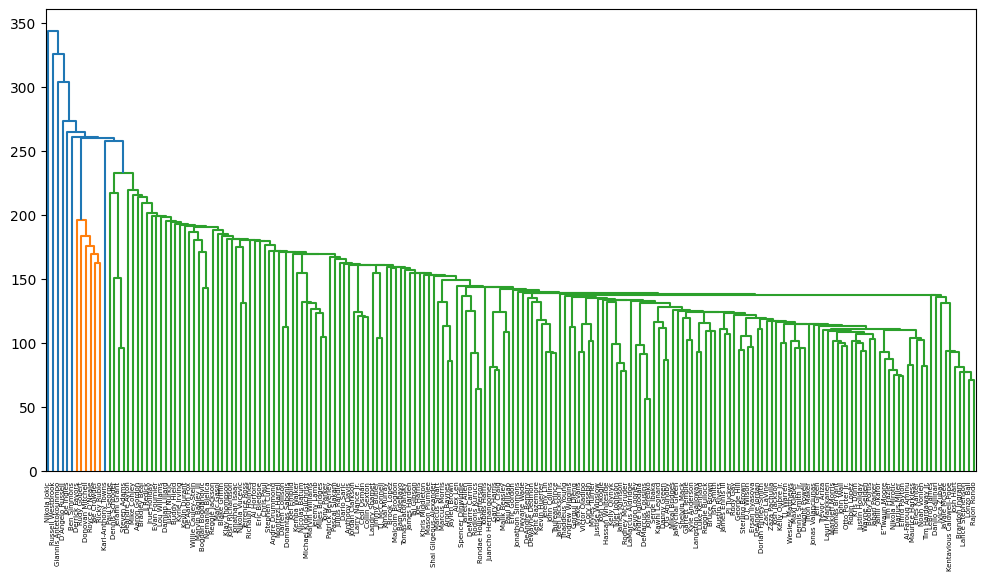

In [89]:
plt.figure(figsize=(12,6))
den = hc.dendrogram(hc.linkage(X, method='single'), orientation='top',labels=X.index)

It is apparent that e clusters are optimal for our hierarchical clustering algorithm, even though one of our clusters is going to be significantly larger than the other two. Let's proceed to perform the clustering and explore the results.

In [90]:
model = AgglomerativeClustering(n_clusters=3)

clusters = model.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
cdf = pd.DataFrame({'player': list(X.index), 'cluster': clusters})

In [93]:
cdf[cdf['cluster'] == 0]

,player,cluster
0,Aaron Gordon,0
1,Al Horford,0
2,Al-Farouq Aminu,0
3,Alex Len,0
4,Andre Drummond,0
...,...,...
193,Wayne Selden,0
194,Wesley Matthews,0
195,Willie Cauley-Stein,0
196,Zach LaVine,0


In [96]:
cdf[cdf['cluster'] == 1]

,player,cluster
40,Derrick Favors,1
43,Donovan Mitchell,1
66,Jae Crowder,1
81,Joe Ingles,1
159,Ricky Rubio,1
164,Royce O'Neale,1
166,Rudy Gobert,1


This seems like the Utah Jazz players for the given season. Weird cluster to have.

In [95]:
cdf[cdf['cluster'] == 2]

,player,cluster
17,Brook Lopez,2
25,D.J. Wilson,2
50,Eric Bledsoe,2
52,Ersan Ilyasova,2
56,George Hill,2
57,Giannis Antetokounmpo,2
110,Khris Middleton,2
125,Malcolm Brogdon,2
173,Sterling Brown,2


Whereas this is definitely the Milwaukee Bucks team for the 18-19 NBA Season. All other players seem to be clustered together in cluster 0. 

After seeing this result I want to see what happens if we create 30 clusters. My hypothesis is that each team will have their exclusive cluster with neglibile error.

In [97]:
model = AgglomerativeClustering(n_clusters=30)

clusters = model.fit_predict(X)
cdf30 = pd.DataFrame({'player': list(X.index), 'cluster': clusters})

In [98]:
cdf30

,player,cluster
0,Aaron Gordon,0
1,Al Horford,16
2,Al-Farouq Aminu,6
3,Alex Len,17
4,Andre Drummond,14
...,...,...
193,Wayne Selden,6
194,Wesley Matthews,6
195,Willie Cauley-Stein,20
196,Zach LaVine,6


In [105]:
cdf30[cdf30['cluster'] == 11]

,player,cluster
7,Anthony Davis,11
30,Darius Miller,11
47,E'Twaun Moore,11
48,Elfrid Payton,11
67,Jahlil Okafor,11
94,Jrue Holiday,11
96,Julius Randle,11
145,Nikola Mirotic,11
183,Tim Frazier,11


Anthony Davis and Jrue Holiday were playing for NOLA in 18'-19'. Coincidence? I think not..

In [107]:
cdf30[cdf30['cluster'] == 7]

,player,cluster
5,Andre Iguodala,7
35,DeMarcus Cousins,7
85,Jonas Jerebko,7
107,Kevin Durant,7
109,Kevon Looney,7
111,Klay Thompson,7
172,Stephen Curry,7


Ok, my hypothesis seems to be at least somewhat true. This is the Golden State Warriors roster!